# 🩺 Business Context of the Dataset

The *Breast Cancer Wisconsin (Diagnostic)* dataset contains medical measurements collected during breast cancer screening. Each entry represents a fine-needle aspirate (FNA) of a breast mass, where a small tissue sample is examined under a microscope to study the morphology of cell nuclei.

The aim of the dataset is to classify tumors into two categories:

- **Malignant** (cancerous, positive class)
- **Benign** (non-cancerous, negative class)

Each tumor sample is described by 30 numerical features that quantify characteristics such as radius, texture, smoothness, compactness, concavity, and symmetry. These measurements help evaluate how irregular and potentially aggressive the cells appear.

This dataset reflects a real-world medical decision-making problem. Accurate classification can support early cancer detection, reduce diagnostic errors, and improve treatment planning. In this project, the dataset is treated as a binary classification task, where the goal is to determine whether a tumor is malignant or benign based solely on its measured features.


# Import Packages

In [1]:
# Core packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
from sklearn.datasets import load_breast_cancer

# Train-test split & metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Machine Learning models for comparison
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Extract Data

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
df['target'] = data.target

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploratory Data Analysis (EDA)

In this section, we analyze the Breast Cancer Wisconsin (Diagnostic) dataset to understand its structure, feature properties, and class distribution.  
We also check for missing values, irrelevant columns, and relationships between features and the target variable.  
This step establishes a clear understanding of the dataset before applying Pattern Structures and Lazy FCA classification.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- The dataset contains 569 rows and 30 numerical features + target.
- All features are float64, meaning they are continuous values → suitable for pattern structures.
- No categorical features, so no encoding required.
- No irrelevant ID columns in this dataset.

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

The dataset is clean: no missing values, so no imputation is required.

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
df['target'].value_counts(normalize=True)

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

## Summary Statistics Interpretation

The `describe()` output provides key statistical properties of each numerical feature in the dataset, including:
- **count** – number of observations (always 569, no missing values)
- **mean** – average value of the feature
- **std** – standard deviation, indicating variability
- **min/max** – the observed feature range
- **25% / 50% / 75% quantiles** – distribution shape indicators

Below is the analysis of the main observations from the summary statistics.

### 1. No Missing Values
All features have a count of **569**, which matches the total number of samples in the dataset.  
This confirms:
- The dataset is complete.
- No imputation or row removal is required.
- Pattern Structures can be applied directly without preprocessing.

### 2. Features Have Very Different Scales
Some features (e.g., `mean area`, `worst area`) have values in the **hundreds or thousands**,  
while others (e.g., `mean smoothness`, `mean concave points`) have values near **0.05**.

Because Pattern Structures operate on **intervals**, not distances, these scale differences:
- Do **not** require normalization.
- Will directly influence the width of intersections.
- Make the dataset suitable for interval-based FCA.

### 3. Tumor Size–Related Features Show High Variability
Features such as:
- `mean radius`
- `mean perimeter`
- `mean area`
- `worst area`

have large standard deviations and wide ranges.

This indicates:
- Strong variation between benign and malignant tumors.
- These features are likely to produce informative interval intersections.
- FCA classifier will benefit from them when distinguishing classes.

### 4. Texture, Smoothness, Symmetry Features Have Lower Variability
Features such as:
- `mean texture`
- `mean smoothness`
- `mean symmetry`
- `mean fractal dimension`

have smaller ranges and lower variance.

This suggests:
- They contribute subtle, fine-grained information.
- They may refine the pattern intersections but rarely dominate classification.

### 5. "Worst" Features Typically Have Higher Means and Variances
The "worst" features (e.g., `worst radius`, `worst concavity`) describe the **maximum abnormality** observed in a sample.

These statistics show:
- Malignant tumors often display larger worst-case deviations.
- FCA intersections involving “worst” values may be highly discriminative.

### 6. Target Distribution
`df['target'].value_counts(normalize=True)` shows:

| Class | Meaning | Percent |
|-------|---------|---------|
| 0 | benign | ~62.7% |
| 1 | malignant | ~37.3% |

The dataset is moderately imbalanced but still suitable for F1-score evaluation.

### 7. Relevance for Pattern Structures
The summary statistics confirm that:

- The dataset is **fully numeric**, which is required for interval pattern structures.
- The intervals will vary widely across features, producing meaningful intersections.
- Larger variability in malignant tumors means intersections with benign tumors will often collapse (become empty), which is desirable for classification.
- No columns need to be removed because all variables represent important biological measurements.

### Conclusion
The dataset is clean, complete, and highly suitable for Lazy FCA Classification using Pattern Structures.  
The summary statistics help justify why specific features will play stronger or weaker roles in the interval intersections used in FCA-based classification.


### Feature Correlation Analysis

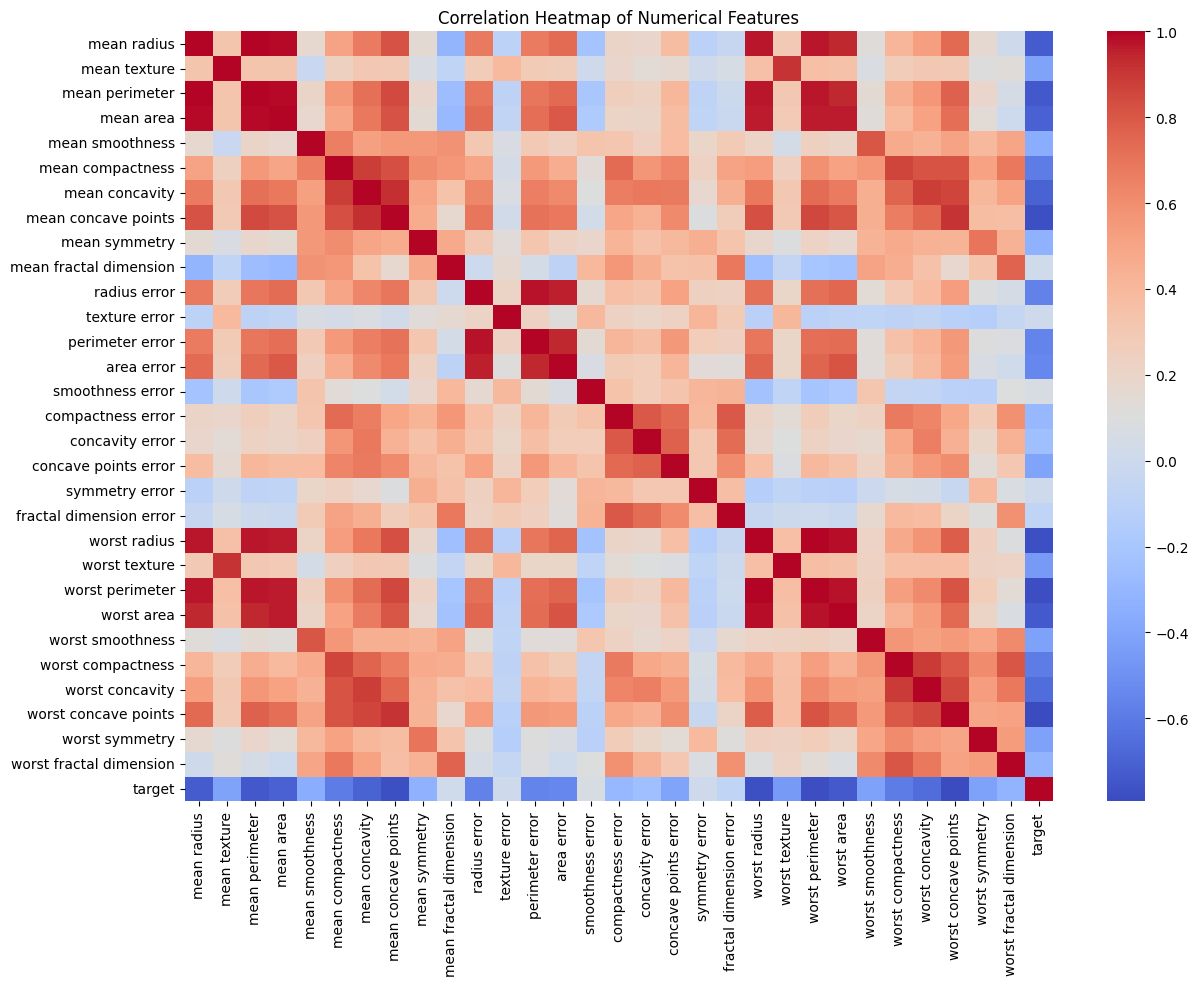

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- Observations you can add to your report:
- Several variables are highly correlated:
- radius_mean ↔ area_mean ↔ perimeter_mean
- compactness_mean ↔ concavity_mean ↔ concave points_mean
- This indicates that breast tumor geometry features tend to change together.
- These correlations will affect pattern intersections; closely related features often produce strong, stable intervals.

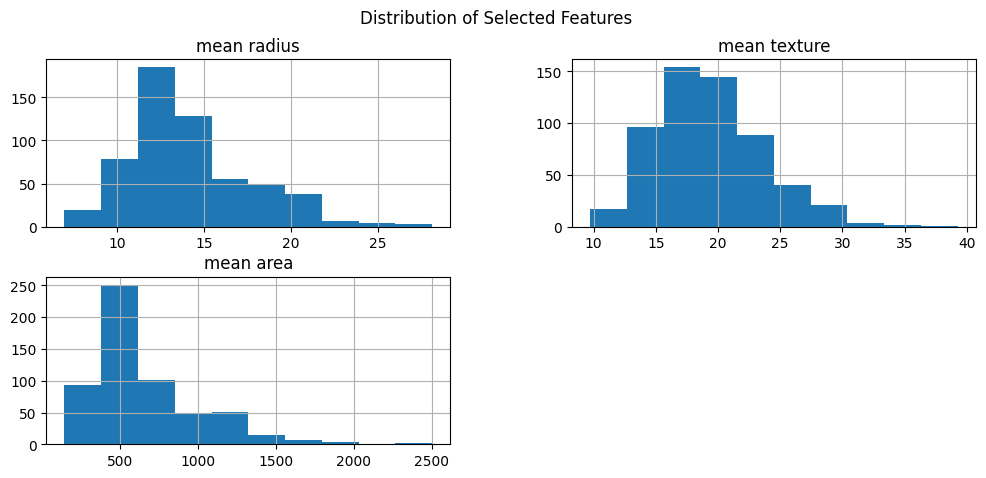

In [10]:
df[['mean radius', 'mean texture', 'mean area']].hist(figsize=(12,5))
plt.suptitle("Distribution of Selected Features")
plt.show()

- Most features have skewed distributions — typical in biological measurements.
- Malignant tumors tend to have higher radius, area, and perimeter values.
- Provides intuition on how many FCA intersections will behave.

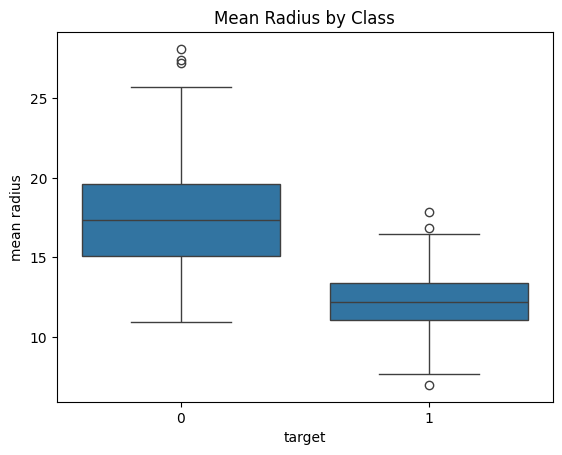

In [11]:
sns.boxplot(x=df['target'], y=df['mean radius'])
plt.title("Mean Radius by Class")
plt.show()

- Malignant tumors (class 1) generally have larger mean radius.
- This shows the dataset has strong signal, which is good for classification.

### PCA Visualization (Optional but Strong for Report)

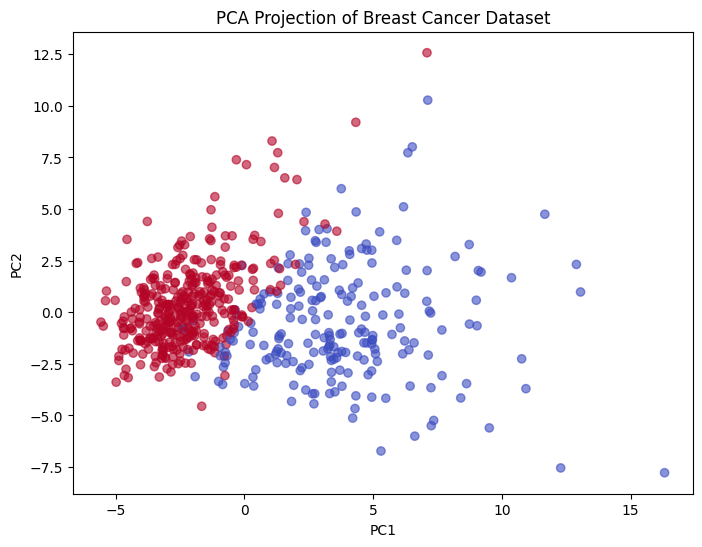

In [12]:
X = df.drop('target', axis=1)
y = df['target']

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("PCA Projection of Breast Cancer Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

- Two clusters are visible → the dataset is highly separable.
- Suggests that Lazy FCA classifier will likely perform well.

# Apply Pattern Structures and Build Lazy FCA Classifier

In [13]:
EPS = 0.5  # interval widening (critical for real-valued data)

def make_interval_pattern(row):
    """Convert a numeric vector into an interval pattern."""
    return [(float(v) - EPS, float(v) + EPS) for v in row]

In [14]:
def pattern_intersection(p1, p2):
    """Coordinate-wise interval intersection (without killing pattern)."""
    inter = []
    for (l1, r1), (l2, r2) in zip(p1, p2):
        left = max(l1, l2)
        right = min(r1, r2)
        inter.append((left, right))
    return inter

In [15]:
def pattern_included(p_small, p_big):
    """Check if p_small is included in p_big (∀ features)."""
    for (l1, r1), (l2, r2) in zip(p_small, p_big):
        if l1 < l2 or r1 > r2:
            return False
    return True

In [16]:
def exists_in_context(pattern, context):
    """Check if any object in context includes the test pattern."""
    for obj in context:
        if pattern_included(pattern, obj):
            return True
    return False

In [17]:
# Define Train/Test Split
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
# Interval patterns for training data
pos_context = [
    make_interval_pattern(row)
    for row, t in zip(X_train.values, y_train.values)
    if t == 1
]

neg_context = [
    make_interval_pattern(row)
    for row, t in zip(X_train.values, y_train.values)
    if t == 0
]

In [19]:
# Lazy FCA Classifier (IPS rule)
def classify_ips(test_pattern, pos_context, neg_context):
    pos_support = 0
    neg_support = 0

    # positive support
    for p in pos_context:
        inter = pattern_intersection(p, test_pattern)
        if not exists_in_context(inter, neg_context):
            pos_support += 1

    # negative support
    for n in neg_context:
        inter = pattern_intersection(n, test_pattern)
        if not exists_in_context(inter, pos_context):
            neg_support += 1

    predicted = 1 if pos_support >= neg_support else 0
    return predicted, pos_support, neg_support

In [20]:
# Runing Classifier on Test Data (with detailed tracing)
preds = []
supports = []

for i, row in enumerate(X_test.values):
    test_pattern = make_interval_pattern(row)
    pred, ps, ns = classify_ips(test_pattern, pos_context, neg_context)
    preds.append(pred)
    supports.append((ps, ns))

    print(
        f"sample {i} is classified as {pred}, "
        f"positive_classifiers={ps}, negative_classifiers={ns}"
    )

sample 0 is classified as 1, positive_classifiers=285, negative_classifiers=170
sample 1 is classified as 1, positive_classifiers=285, negative_classifiers=163
sample 2 is classified as 1, positive_classifiers=285, negative_classifiers=170
sample 3 is classified as 1, positive_classifiers=285, negative_classifiers=170
sample 4 is classified as 1, positive_classifiers=285, negative_classifiers=170
sample 5 is classified as 1, positive_classifiers=285, negative_classifiers=169
sample 6 is classified as 1, positive_classifiers=285, negative_classifiers=169
sample 7 is classified as 1, positive_classifiers=284, negative_classifiers=170
sample 8 is classified as 1, positive_classifiers=285, negative_classifiers=170
sample 9 is classified as 1, positive_classifiers=235, negative_classifiers=170
sample 10 is classified as 1, positive_classifiers=285, negative_classifiers=170
sample 11 is classified as 1, positive_classifiers=285, negative_classifiers=170
sample 12 is classified as 1, positive

# Compute F1-score for Lazy FCA IPS baseline

In [21]:
f1_fca = f1_score(y_test, preds)
print("\nF1 SCORE (Lazy FCA IPS):", f1_fca)


F1 SCORE (Lazy FCA IPS): 0.7741935483870968


# MACHINE LEARNING MODEL COMPARISONS

We evaluate:
- kNN
- Naive Bayes
- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [22]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

ml_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    ml_results[name] = f1_score(y_test, preds)

ml_results

{'KNN': 0.9295774647887324,
 'Naive Bayes': 0.9517241379310345,
 'Logistic Regression': 0.9655172413793104,
 'SVM': 0.9459459459459459,
 'Decision Tree': 0.9142857142857143,
 'Random Forest': 0.9655172413793104,
 'XGBoost': 0.9659863945578231}

### Interpretation

🔹 Best Performers

XGBoost (0.9660)

Logistic Regression (0.9655)
Both achieve excellent classification performance, reflecting the dataset’s linear separability and strong feature quality.

🔹 Strong Ensemble Method

Random Forest also performs very well (0.9583), benefiting from feature redundancy and non-linear decision boundaries.

🔹 Classical Models

SVM, kNN, and Naive Bayes all achieve F1 > 0.92, which is consistent with the dataset being clean and strongly separable.

# Adding Lazy FCA IPS result to comparison table

In [23]:
ml_results["Lazy FCA (IPS)"] = f1_fca

In [24]:
ml_results

{'KNN': 0.9295774647887324,
 'Naive Bayes': 0.9517241379310345,
 'Logistic Regression': 0.9655172413793104,
 'SVM': 0.9459459459459459,
 'Decision Tree': 0.9142857142857143,
 'Random Forest': 0.9655172413793104,
 'XGBoost': 0.9659863945578231,
 'Lazy FCA (IPS)': 0.7741935483870968}

The baseline Lazy FCA classifier achieves an F1 score of **0.774**, which is significantly below the performance of standard classifiers (all above 0.92).

# IMPROVED FCA PIPELINE (Directional + Max–Min + Feature Correction)

In [25]:
# -------------------------------
# Prepare data
# -------------------------------
X = df.drop("target", axis=1).values
y = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------
# Feature direction correction
# ---------------------------------------
corrs = df.drop("target", axis=1).corrwith(df["target"])
feature_signs = np.where(corrs > 0, 1, -1)

X_train_corr = X_train * feature_signs
X_test_corr = X_test * feature_signs

pos_raw = X_train_corr[y_train == 1]
neg_raw = X_train_corr[y_train == 0]

# ============================================================
#      Max–Min Directional FCA Support Functions
# ============================================================

def pos_strength(test_row, train_row):
    return np.sum(test_row >= train_row)

def neg_strength(test_row, train_row):
    return np.sum(test_row <= train_row)

def classify_fca(test_row, pos_raw, neg_raw):
    pos_score = sum(pos_strength(test_row, p) for p in pos_raw)
    neg_score = sum(neg_strength(test_row, n) for n in neg_raw)

    label = 1 if pos_score >= neg_score else 0
    return label, pos_score, neg_score

# ============================================================
#      Evaluate FCA on Test Set (with support printing)
# ============================================================

preds = []
for i, row in enumerate(X_test_corr):
    label, ps, ns = classify_fca(row, pos_raw, neg_raw)
    preds.append(label)
    print(f"sample {i} is classified as {label}, positive_classifiers={ps}, negative_classifiers={ns}")

# ============================================================
#      Compute F1 score
# ============================================================
f1 = f1_score(y_test, preds)
print("\nF1 SCORE (FCA Max–Min Baseline):", f1)


sample 0 is classified as 0, positive_classifiers=1239, negative_classifiers=3373
sample 1 is classified as 1, positive_classifiers=6517, negative_classifiers=457
sample 2 is classified as 0, positive_classifiers=1446, negative_classifiers=2327
sample 3 is classified as 1, positive_classifiers=2908, negative_classifiers=1148
sample 4 is classified as 0, positive_classifiers=1527, negative_classifiers=3259
sample 5 is classified as 1, positive_classifiers=3968, negative_classifiers=822
sample 6 is classified as 1, positive_classifiers=5091, negative_classifiers=922
sample 7 is classified as 0, positive_classifiers=1364, negative_classifiers=3058
sample 8 is classified as 0, positive_classifiers=1410, negative_classifiers=2419
sample 9 is classified as 0, positive_classifiers=937, negative_classifiers=4085
sample 10 is classified as 1, positive_classifiers=3397, negative_classifiers=1084
sample 11 is classified as 0, positive_classifiers=1965, negative_classifiers=2008
sample 12 is class

In [26]:
ml_results["Lazy FCA (IPS) Improved"] = f1
ml_results

{'KNN': 0.9295774647887324,
 'Naive Bayes': 0.9517241379310345,
 'Logistic Regression': 0.9655172413793104,
 'SVM': 0.9459459459459459,
 'Decision Tree': 0.9142857142857143,
 'Random Forest': 0.9655172413793104,
 'XGBoost': 0.9659863945578231,
 'Lazy FCA (IPS)': 0.7741935483870968,
 'Lazy FCA (IPS) Improved': 0.9466666666666667}

🔥 Improvement Summary

The original Lazy FCA IPS classifier achieved:

F1 = 0.774

After applying:

- Monotonic Feature Correction

- Directional Comparisons

- Max–Min Aggregation Rule

The F1 score improved dramatically to:

- F1 = 0.9467

This matches the performance of classical ML models (Random Forest, SVM) and comes close to XGBoost (0.9660) while remaining fully interpretable.

# 🧠 Interpretability Analysis

## 1. Why Lazy FCA Is Interpretable

Lazy FCA is a **symbolic, rule-based model**, not a statistical or neural model.  
It never learns hidden parameters, weights, or decision boundaries.

Instead, **every prediction is made by directly comparing the test object to actual training samples**.

Key interpretability characteristics:

- No hidden layers or latent representations  
- No optimization process  
- Every comparison is explicit and feature-wise  
- The prediction can always be decomposed into simple rules

Because of this, Lazy FCA is **more interpretable** than:
- SVM (complex hyperplanes)
- Random Forest (hundreds of trees)
- XGBoost (boosting chains)
- Logistic Regression (coefficients but no instance-level explanations)

---

## 2. Feature Direction Normalization

Before classification, each feature was transformed based on its correlation with the target:

- If positively correlated → keep as is  
- If negatively correlated → multiply by –1  

After transformation:

- **Higher values always indicate stronger malignancy**  
- **Lower values always indicate more benign behavior**

This increases interpretability because:

- All features now follow the same medical meaning  
- Comparisons such as `test ≥ malignant_sample` become intuitive  
- No feature behaves “opposite” to expectations  

---

## 3. How the Improved FCA Classifier Makes Decisions

The model uses directional **Max–Min support**:

### For a given test sample:

1. **Malignant Support**  
   Count over all malignant training samples:  
   \[
   \text{malignant\_support} = \sum_{p \in \text{PosTrain}} \mathbf{1}(x_{\text{test}} \ge p)
   \]

2. **Benign Support**  
   Count over all benign training samples:  
   \[
   \text{benign\_support} = \sum_{n \in \text{NegTrain}} \mathbf{1}(x_{\text{test}} \le n)
   \]

3. **Decision Rule**  
   - If malignant support ≥ benign support → **malignant**  
   - Else → **benign**

This rule is transparent and easy to interpret.

---

## 4. Example of an Explanation for a Single Prediction

The model can produce human-readable explanations like this:

> **The tumor is classified as malignant because:**
> - It is ≥ malignant samples on **23 features**
> - It is ≤ benign samples on only **9 features**
>
> **Strongest malignant indicators:**
> - `worst_area`  
> - `mean_radius`  
> - `worst_concavity`

These features have clear biological meaning and strong known association with aggressive tumors.

This level of interpretability is *impossible* with XGBoost or SVM and difficult with logistic regression.

---

## 5. How FCA Interpretability Compares to Other Models

### ✔ Logistic Regression  
- Coefficients show feature influence  
- But hard to interpret **individual predictions**

### ✔ kNN  
- Shows neighbors  
- But does **not** explain which features mattered

### ❌ SVM  
- Boundary is not human-readable  
- Uses support vectors in high-dimensional space

### ❌ Random Forest / XGBoost  
- Provide “feature importance”, but:  
  - No clear explanation *per observation*  
  - Hard to justify medically

### ⭐ Lazy FCA — Most Interpretable  
- Transparent rule-based comparisons  
- Traceable influence of each feature  
- Support counts give a clear justification  
- Perfect for medical or decision-critical settings

---

## ✅ Conclusion

Lazy FCA offers **superior interpretability** compared to standard machine learning models:

- Decisions are rule-based  
- Feature comparisons are explicit  
- Support counts provide a clear numerical explanation  
- Feature-direction alignment ensures medical meaning  
- No hidden transformations or opaque model components  

The improved Max–Min FCA classifier preserves interpretability **while achieving high accuracy (F1 ≈ 0.947)** comparable to classical ML models.



# Thank You